In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook_connected'


In [2]:
# Load the datasets
customer_data = pd.read_csv('Customers.csv')
sales_data = pd.read_csv('Sales.csv')

In [3]:
# Display the customer data
customer_data

Customer ID bracket_cust_id      Customer Name      Segment  Age  \
0      CG-12520      (CG-12520)        Claire Gute     Consumer   67   
1      DV-13045      (DV-13045)    Darrin Van Huff    Corporate   31   
2      SO-20335      (SO-20335)     Sean O'Donnell     Consumer   65   
3      BH-11710      (BH-11710)    Brosina Hoffman     Consumer   20   
4      AA-10480      (AA-10480)       Andrew Allen     Consumer   50   
..          ...             ...                ...          ...  ...   
788    CJ-11875      (CJ-11875)       Carl Jackson    Corporate   64   
789    RS-19870      (RS-19870)         Roy Skaria  Home Office   39   
790    SC-20845      (SC-20845)         Sung Chung     Consumer   69   
791    RE-19405      (RE-19405)    Ricardo Emerson     Consumer   35   
792    SM-20905      (SM-20905)  Susan MacKendrick     Consumer   46   

           Country               City           State  Postal Code   Region  
0    United States          Henderson        Kentucky        42420    South  
1    United States        Los Angeles      California        90036     West  
2    United States    Fort Lauderdale         Florida        33311    South  
3    United States        Los Angeles      California        90032     West  
4    United States            Concord  North Carolina        28027    South  
..             ...                ...             ...          ...      ...  
788  United States       Philadelphia    Pennsylvania        19140     East  
789  United States         Burlington            Iowa        52601  Central  
790  United States  Arlington Heights        Illinois        60004  Central  
791  United States               Kent            Ohio        44240     East  
792  United States             Newark            Ohio        43055     East  

[793 rows x 10 columns]

In [4]:
# Display the sales data
sales_data

Order Line        Order ID  Order Date   Ship Date       Ship Mode  \
0              1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1              2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2              3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3              4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4              5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...          ...             ...         ...         ...             ...   
9989        9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990        9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991        9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992        9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993        9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID       Product ID   Sales  Quantity  Discount  Profit  
0       CG-12520  FUR-BO-10001798  261.96         2      0.00   41.91  
1       CG-12520  FUR-CH-10000454  731.94         3      0.00  219.58  
2       DV-13045  OFF-LA-10000240   14.62         2      0.00    6.87  
3       SO-20335  FUR-TA-10000577  957.58         5      0.45 -383.03  
4       SO-20335  OFF-ST-10000760   22.37         2      0.20    2.52  
...          ...              ...     ...       ...       ...     ...  
9989    TB-21400  FUR-FU-10001889   25.25         3      0.20    4.10  
9990    DB-13060  FUR-FU-10000747   91.96         2      0.00   15.63  
9991    DB-13060  TEC-PH-10003645  258.58         2      0.20   19.39  
9992    DB-13060  OFF-PA-10004041   29.60         4      0.00   13.32  
9993    CC-12220  OFF-AP-10002684  243.16         2      0.00   72.95  

[9994 rows x 11 columns]

## Understanding the Data

In [5]:
# Check for missing values in customer data
customer_data.isnull().sum()

Customer ID        0
bracket_cust_id    0
Customer Name      0
Segment            0
Age                0
Country            3
City               2
State              1
Postal Code        0
Region             0
dtype: int64

In [6]:
# Check for missing values in sales data
sales_data.isnull().sum()

Order Line     0
Order ID       0
Order Date     0
Ship Date      0
Ship Mode      0
Customer ID    0
Product ID     0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

In [7]:
# Drop duplicates if any
customer_data = customer_data.drop_duplicates()
sales_data = sales_data.drop_duplicates()

In [8]:
# Check data information for customer data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer ID      793 non-null    object
 1   bracket_cust_id  793 non-null    object
 2   Customer Name    793 non-null    object
 3   Segment          793 non-null    object
 4   Age              793 non-null    int64 
 5   Country          790 non-null    object
 6   City             791 non-null    object
 7   State            792 non-null    object
 8   Postal Code      793 non-null    int64 
 9   Region           793 non-null    object
dtypes: int64(2), object(8)
memory usage: 62.1+ KB


In [9]:
# Check information for sales data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order Line   9994 non-null   int64  
 1   Order ID     9994 non-null   object 
 2   Order Date   9994 non-null   object 
 3   Ship Date    9994 non-null   object 
 4   Ship Mode    9994 non-null   object 
 5   Customer ID  9994 non-null   object 
 6   Product ID   9994 non-null   object 
 7   Sales        9994 non-null   float64
 8   Quantity     9994 non-null   int64  
 9   Discount     9994 non-null   float64
 10  Profit       9994 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 859.0+ KB


## Cleaning and Preparing the Data

In [10]:
# Create categories based on Product ID (first 3 characters for category and next 2 for sub-category)
# Note: 'Product ID' exists in sales_data, not in customer_data — create the columns on sales_data.
sales_data['Category'] = sales_data['Product ID'].str[:3]
sales_data['Sub-Category'] = sales_data['Product ID'].str[4:6]
sales_data.head()

Order Line        Order ID  Order Date   Ship Date       Ship Mode  \
0           1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1           2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2           3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3           4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4           5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   

  Customer ID       Product ID   Sales  Quantity  Discount  Profit Category  \
0    CG-12520  FUR-BO-10001798  261.96         2      0.00   41.91      FUR   
1    CG-12520  FUR-CH-10000454  731.94         3      0.00  219.58      FUR   
2    DV-13045  OFF-LA-10000240   14.62         2      0.00    6.87      OFF   
3    SO-20335  FUR-TA-10000577  957.58         5      0.45 -383.03      FUR   
4    SO-20335  OFF-ST-10000760   22.37         2      0.20    2.52      OFF   

  Sub-Category  
0           BO  
1           CH  
2           LA  
3           TA  
4           ST

In [11]:
# Replace missing cities/states based on postal codes with the most frequent city/state for that postal code
# Create mapping: postal_code -> {'State': state_value, 'City': city_value}
postal_code_to_city = customer_data.groupby('Postal Code')[['Country', 'State', 'City']].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict(orient='index')

# Fill missing City/State using the mapping
def _fill_city_state(row):
    info = postal_code_to_city.get(row['Postal Code'], {})
    city = row['City'] if pd.notnull(row['City']) else info.get('City', np.nan)
    state = row['State'] if pd.notnull(row['State']) else info.get('State', np.nan)
    country = row['Country'] if pd.notnull(row['Country']) else info.get('Country', np.nan)
    return pd.Series({'City': city, 'State': state, 'Country': country})

filled = customer_data.apply(_fill_city_state, axis=1)
customer_data['City'] = filled['City']
customer_data['State'] = filled['State']
customer_data['Country'] = filled['Country']

customer_data.isnull().sum()

Customer ID        0
bracket_cust_id    0
Customer Name      0
Segment            0
Age                0
Country            1
City               0
State              0
Postal Code        0
Region             0
dtype: int64

In [12]:
# Descriptive statistics for Age
customer_data['Age'].describe()

count    793.000000
mean      44.467844
std       15.526673
min       18.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       70.000000
Name: Age, dtype: float64

In [13]:
# Age categorization from 18 to 71 in 4 bins
age_bins = [18, 30, 45, 60, 71]
age_labels = ['18-30', '31-45', '46-60', '61+']
customer_data['Age Group'] = pd.cut(customer_data['Age'], bins=age_bins, labels=age_labels, right=False)
customer_data['Age Group'].value_counts().sort_index()

Age Group
18-30    165
31-45    228
46-60    219
61+      181
Name: count, dtype: int64

In [14]:
# Drop country column because it has only one value
customer_data = customer_data.drop(columns=['Country'])

In [15]:
# The range of dates in the sales data
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date']).dt.date
print(f"Sales data ranges from {sales_data['Order Date'].min()} to {sales_data['Order Date'].max()}, totaling {(sales_data['Order Date'].max() - sales_data['Order Date'].min()).days} days.")

Sales data ranges from 2014-01-03 to 2017-12-30, totaling 1457 days.


In [16]:
# Replace category codes with descriptive names
category_mapping = {'OFF': 'Office Supplies', 'TEC': 'Technology', 'FUR': 'Furniture'}
sales_data['Category'] = sales_data['Category'].map(category_mapping)
sales_data.head()

Order Line        Order ID  Order Date   Ship Date       Ship Mode  \
0           1  CA-2016-152156  2016-11-08  11/11/2016    Second Class   
1           2  CA-2016-152156  2016-11-08  11/11/2016    Second Class   
2           3  CA-2016-138688  2016-06-12   6/16/2016    Second Class   
3           4  US-2015-108966  2015-10-11  10/18/2015  Standard Class   
4           5  US-2015-108966  2015-10-11  10/18/2015  Standard Class   

  Customer ID       Product ID   Sales  Quantity  Discount  Profit  \
0    CG-12520  FUR-BO-10001798  261.96         2      0.00   41.91   
1    CG-12520  FUR-CH-10000454  731.94         3      0.00  219.58   
2    DV-13045  OFF-LA-10000240   14.62         2      0.00    6.87   
3    SO-20335  FUR-TA-10000577  957.58         5      0.45 -383.03   
4    SO-20335  OFF-ST-10000760   22.37         2      0.20    2.52   

          Category Sub-Category  
0        Furniture           BO  
1        Furniture           CH  
2  Office Supplies           LA  
3        Furniture           TA  
4  Office Supplies           ST

In [17]:
# Replace sub-category codes with descriptive names ['BO', 'CH', 'LA', 'TA', 'ST', 'FU', 'AR', 'PH', 'BI', 'AP', 'PA','AC', 'EN', 'FA', 'SU', 'MA', 'CO']
sub_category_mapping = {
    'BO': 'Books',
    'CH': 'Chairs',
    'LA': 'Labels',
    'TA': 'Tables',
    'ST': 'Storage',
    'FU': 'Furnishings',
    'AR': 'Art',
    'PH': 'Phones',
    'BI': 'Binders',
    'AP': 'Appliances',
    'PA': 'Paper',
    'AC': 'Accessories',
    'EN': 'Envelopes',
    'FA': 'Fasteners',
    'SU': 'Supplies',
    'MA': 'Machines',
    'CO': 'Copiers'
}
sales_data['Sub-Category'] = sales_data['Sub-Category'].map(sub_category_mapping)
sales_data.head()

Order Line        Order ID  Order Date   Ship Date       Ship Mode  \
0           1  CA-2016-152156  2016-11-08  11/11/2016    Second Class   
1           2  CA-2016-152156  2016-11-08  11/11/2016    Second Class   
2           3  CA-2016-138688  2016-06-12   6/16/2016    Second Class   
3           4  US-2015-108966  2015-10-11  10/18/2015  Standard Class   
4           5  US-2015-108966  2015-10-11  10/18/2015  Standard Class   

  Customer ID       Product ID   Sales  Quantity  Discount  Profit  \
0    CG-12520  FUR-BO-10001798  261.96         2      0.00   41.91   
1    CG-12520  FUR-CH-10000454  731.94         3      0.00  219.58   
2    DV-13045  OFF-LA-10000240   14.62         2      0.00    6.87   
3    SO-20335  FUR-TA-10000577  957.58         5      0.45 -383.03   
4    SO-20335  OFF-ST-10000760   22.37         2      0.20    2.52   

          Category Sub-Category  
0        Furniture        Books  
1        Furniture       Chairs  
2  Office Supplies       Labels  
3        Furniture       Tables  
4  Office Supplies      Storage

In [18]:
# Extract month and year from 'Order Date'
sales_data['Month'] = pd.to_datetime(sales_data['Order Date']).dt.month
sales_data['Year'] = pd.to_datetime(sales_data['Order Date']).dt.year

In [19]:
# Number of orders in sales data
print(f"Total number of orders: {sales_data['Order ID'].nunique()}")

Total number of orders: 5009


In [20]:
# Number of customers ordering
print(f"Total number of customers: {sales_data['Customer ID'].nunique()}")

Total number of customers: 793


In [21]:
# Number of unique products in sales data
print(f"Number of unique products: {sales_data['Product ID'].nunique()}")

Number of unique products: 1862


In [22]:
# Number of unique categories
print(f"Number of unique categories: {sales_data['Category'].nunique()}")
print(f"Number of unique sub-categories: {sales_data['Sub-Category'].nunique()}")

Number of unique categories: 3
Number of unique sub-categories: 17


In [23]:
# Count of categories in sales data
print(sales_data['Category'].value_counts(normalize=True))# Count of sub-categories in sales data
print(sales_data['Sub-Category'].value_counts(normalize=True))


Category
Office Supplies    0.602962
Furniture          0.212227
Technology         0.184811
Name: proportion, dtype: float64
Sub-Category
Binders        0.152391
Paper          0.137082
Furnishings    0.095757
Phones         0.088953
Storage        0.084651
Art            0.079648
Accessories    0.077547
Chairs         0.061737
Appliances     0.046628
Labels         0.036422
Tables         0.031919
Envelopes      0.025415
Books          0.022814
Fasteners      0.021713
Supplies       0.019011
Machines       0.011507
Copiers        0.006804
Name: proportion, dtype: float64


Profit/Loss
Profit    0.812788
Loss      0.187212
Name: proportion, dtype: float64


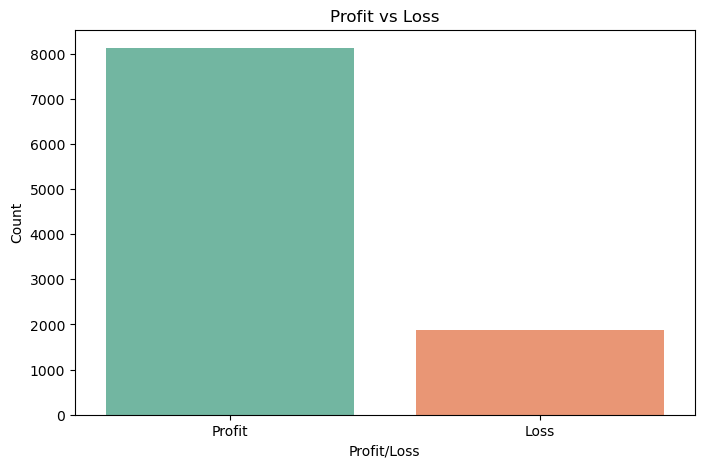

In [24]:
# Profit or loss
sales_data['Profit/Loss'] = np.where(sales_data['Profit'] >= 0, 'Profit', 'Loss')
print(sales_data['Profit/Loss'].value_counts(normalize=True))
# Visalize profit vs loss
plt.figure(figsize=(8, 5))
sns.countplot(data=sales_data, x='Profit/Loss', palette='Set2', hue='Profit/Loss')
plt.title('Profit vs Loss')
plt.xlabel('Profit/Loss')
plt.ylabel('Count')
plt.show()

Sales data ranges from 2014-01-03 to 2017-12-30, totaling 1457 days. There are 793 unique customers, 5009 unique orders, and 1862 unique products in the sales dataset. The customer data includes 793 unique customers across various segments and regions. The sales data contains 3 main categories: Office Supplies, Technology, and Furniture, with 17 sub-categories under each. Profitability analysis shows that approximately 81.28% of transactions are profitable, while 18.72% result in a loss.

In [25]:
# Number of unique customers in customer data
print(f"Number of unique customers: {customer_data['Customer ID'].nunique()}")

Number of unique customers: 793


Segment
Consumer       0.515763
Corporate      0.297604
Home Office    0.186633
Name: proportion, dtype: float64


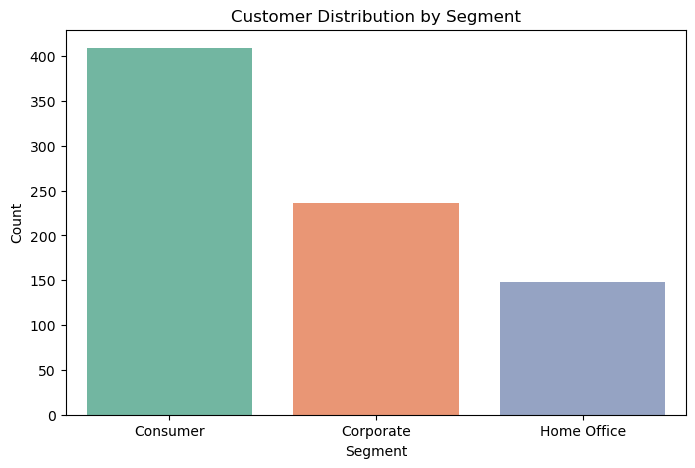

In [26]:
# Customer segments in customer data
print(customer_data['Segment'].value_counts(normalize=True))
# Visualize customer segments
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, x='Segment', palette='Set2', hue='Segment')
plt.title('Customer Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

Customer counts by region:
Region
West       255
East       220
Central    184
South      134
Name: count, dtype: int64

Proportion of customers by region:
Region
West       0.321564
East       0.277427
Central    0.232030
South      0.168979
Name: proportion, dtype: float64


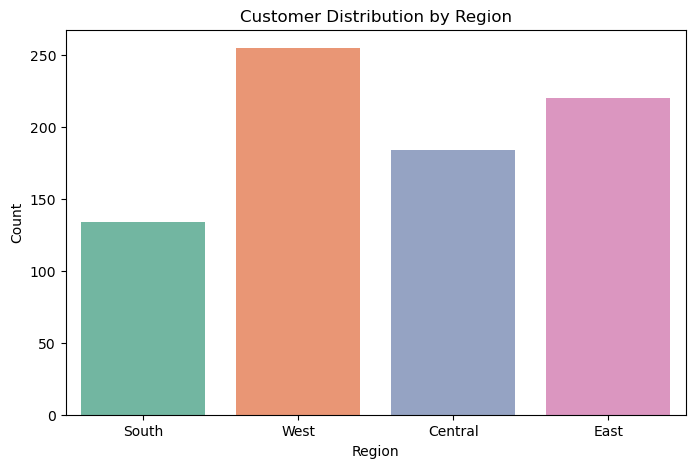

In [27]:
# Regions in customer data
print("Customer counts by region:")
print(customer_data['Region'].value_counts())
print("\nProportion of customers by region:")
print(customer_data['Region'].value_counts(normalize=True))
# Visualize regions
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, x='Region', palette='Set2', hue='Region')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

- In the customer data, there are a total of 793 unique customers in three segments: Consumer, Corporate, and Home Office. The Consumer segment makes up the largest proportion of customers at approximately 51.58%, followed by Corporate at 29.76%, and Home Office at 18.66%.
- The regions are distributed as follows: West (32.16%), East (27.74%), Central (23.20%), and South (16.90%).

In [28]:
# Merge customer and sales data on 'Customer ID'
merged_data = pd.merge(sales_data, customer_data, on='Customer ID', how='left')
merged_data.head()

Order Line        Order ID  Order Date   Ship Date       Ship Mode  \
0           1  CA-2016-152156  2016-11-08  11/11/2016    Second Class   
1           2  CA-2016-152156  2016-11-08  11/11/2016    Second Class   
2           3  CA-2016-138688  2016-06-12   6/16/2016    Second Class   
3           4  US-2015-108966  2015-10-11  10/18/2015  Standard Class   
4           5  US-2015-108966  2015-10-11  10/18/2015  Standard Class   

  Customer ID       Product ID   Sales  Quantity  Discount  ...  Profit/Loss  \
0    CG-12520  FUR-BO-10001798  261.96         2      0.00  ...       Profit   
1    CG-12520  FUR-CH-10000454  731.94         3      0.00  ...       Profit   
2    DV-13045  OFF-LA-10000240   14.62         2      0.00  ...       Profit   
3    SO-20335  FUR-TA-10000577  957.58         5      0.45  ...         Loss   
4    SO-20335  OFF-ST-10000760   22.37         2      0.20  ...       Profit   

  bracket_cust_id    Customer Name    Segment  Age             City  \
0      (CG-12520)      Claire Gute   Consumer   67        Henderson   
1      (CG-12520)      Claire Gute   Consumer   67        Henderson   
2      (DV-13045)  Darrin Van Huff  Corporate   31      Los Angeles   
3      (SO-20335)   Sean O'Donnell   Consumer   65  Fort Lauderdale   
4      (SO-20335)   Sean O'Donnell   Consumer   65  Fort Lauderdale   

        State Postal Code Region  Age Group  
0    Kentucky       42420  South        61+  
1    Kentucky       42420  South        61+  
2  California       90036   West      31-45  
3     Florida       33311  South        61+  
4     Florida       33311  South        61+  

[5 rows x 25 columns]

## Exploring Key Business Questions

### Customer Insights



#### Age Distribution Analysis

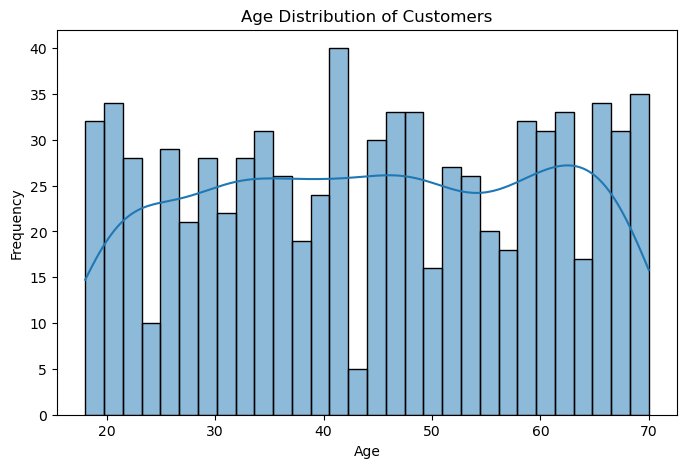

In [29]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(customer_data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Box plot of age
age_box_fig = px.box(customer_data, y='Age',height=600, width=800, title='Box Plot of Customer Ages')
age_box_fig.show()

In [31]:
# What is the age distribution across different customer segments?
age_segment_fig = px.box(customer_data, x='Segment', y='Age', color='Segment',height=600, width=800, title='Age Distribution Across Customer Segments')
age_segment_fig.show()

In [32]:
# ANOVA test to see if age differs significantly across customer segments

anova_result = stats.f_oneway(
    customer_data[customer_data['Segment'] == 'Consumer']['Age'].dropna(),
    customer_data[customer_data['Segment'] == 'Corporate']['Age'].dropna(),
    customer_data[customer_data['Segment'] == 'Home Office']['Age'].dropna()
)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print("There is a significant difference in age across customer segments.")
else:
    print("No significant difference in age across customer segments.")

ANOVA result: F-statistic = 0.1795113122651887, p-value = 0.8357125753930718
No significant difference in age across customer segments.


Box plot shows similar age distributions across all customer segments, with median ages around the same level and overlapping interquartile ranges. The ANOVA test results (p-value > 0.05) indicate that there is no statistically significant difference in age across customer segments in this dataset.

In [33]:
# What is the age distribution across different customer regions?
age_region_fig = px.box(customer_data, x='Region', y='Age', color='Region',height=600, width=800, title='Age Distribution Across Customer Regions')
age_region_fig.show()

In [34]:
# ANOVA test to see if age differs significantly across customer regions
anova_region_result = stats.f_oneway(
    customer_data[customer_data['Region'] == 'East']['Age'].dropna(),
    customer_data[customer_data['Region'] == 'West']['Age'].dropna(),
    customer_data[customer_data['Region'] == 'Central']['Age'].dropna()
)
print(f"ANOVA result: F-statistic = {anova_region_result.statistic}, p-value = {anova_region_result.pvalue}")
if anova_region_result.pvalue < 0.05:
    print("There is a significant difference in age across customer regions.")
else:
    print("No significant difference in age across customer regions.")

ANOVA result: F-statistic = 0.02358030089268894, p-value = 0.9766963698111525
No significant difference in age across customer regions.


In [35]:
# What is the age distribution across different State categories?
age_region_fig = px.box(customer_data, x='State', y='Age', color='Region',height=800, width=1000, title='Age Distribution Across Customer Regions')
age_region_fig.show()

In [36]:
# ANOVA test to see if age differs significantly across State categories
state_groups = [customer_data[customer_data['State'] == state]['Age'].dropna() for state in customer_data['State'].unique()]
anova_state_result = stats.f_oneway(*state_groups)
print(f"ANOVA result: F-statistic = {anova_state_result.statistic}, p-value = {anova_state_result.pvalue}")
if anova_state_result.pvalue < 0.05:
    print("There is a significant difference in age across State categories.")
else:
    print("No significant difference in age across State categories.")

ANOVA result: F-statistic = 1.0892692031440407, p-value = 0.3279364695492146
No significant difference in age across State categories.


In [37]:
# What is the age distribution across different Ship Modes?
age_shipmode_fig = px.box(merged_data, x='Ship Mode', y='Age', color='Ship Mode',height=600, width=800, title='Age Distribution Across Ship Modes')
age_shipmode_fig.show()

In [38]:
# ANOVA test to see if age differs significantly across Ship Modes
anova_shipmode_result = stats.f_oneway(
    merged_data[merged_data['Ship Mode'] == 'First Class']['Age'].dropna(),
    merged_data[merged_data['Ship Mode'] == 'Second Class']['Age'].dropna(),
    merged_data[merged_data['Ship Mode'] == 'Standard Class']['Age'].dropna(),
    merged_data[merged_data['Ship Mode'] == 'Same Day']['Age'].dropna()
)
print(f"ANOVA result: F-statistic = {anova_shipmode_result.statistic}, p-value = {anova_shipmode_result.pvalue}")
if anova_shipmode_result.pvalue < 0.05:
    print("There is a significant difference in age across Ship Modes.")
else:
    print("No significant difference in age across Ship Modes.")

ANOVA result: F-statistic = 2.3584917500937133, p-value = 0.06959702336876959
No significant difference in age across Ship Modes.


In [39]:
# What is the age distribution across different Categories?
age_category_fig = px.box(merged_data, x='Category', y='Age', color='Category',height=600, width=800, title='Age Distribution Across Categories')
age_category_fig.show()

In [40]:
# ANOVA test to see if age differs significantly across categories
anova_category_result = stats.f_oneway(
    merged_data[merged_data['Category'] == 'Furniture']['Age'].dropna(),
    merged_data[merged_data['Category'] == 'Office Supplies']['Age'].dropna(),
    merged_data[merged_data['Category'] == 'Technology']['Age'].dropna()
)
print(f"ANOVA result: F-statistic = {anova_category_result.statistic}, p-value = {anova_category_result.pvalue}")
if anova_category_result.pvalue < 0.05:
    print("There is a significant difference in age across Categories.")
else:
    print("No significant difference in age across Categories.")

ANOVA result: F-statistic = 0.6428165301824491, p-value = 0.5258311238049834
No significant difference in age across Categories.


In [41]:
# What is the age distribution across different Sub Categories?
age_subcategory_fig = px.box(merged_data, x='Sub-Category', y='Age', color='Sub-Category', height=600, width=800, title='Age Distribution Across Sub Categories')
age_subcategory_fig.show()

In [42]:
# ANOVA test to see if age differs significantly across sub categories
age_value_groups = [merged_data[merged_data['Sub-Category'] == subcategory]['Age'] for subcategory in merged_data['Sub-Category'].unique()]
anova_age_value_result = stats.f_oneway(*age_value_groups)
print(f"ANOVA result: F-statistic = {anova_age_value_result.statistic}, p-value = {anova_age_value_result.pvalue}")
if anova_age_value_result.pvalue < 0.05:
    print("There is a significant difference in age across Sub Categories.")
else:
    print("No significant difference in age across Sub Categories.")

ANOVA result: F-statistic = 0.7630266780316128, p-value = 0.7294351044889795
No significant difference in age across Sub Categories.


In [43]:
# What is the age distribution across different Profit/Loss categories?
age_subcategory_fig = px.box(merged_data, x='Profit/Loss', y='Age', color='Profit/Loss', height=600, width=800, title='Age Distribution Across Profit/Loss Categories')
age_subcategory_fig.show()

In [44]:
# T-test test to see if age differs significantly across Profit/Loss categories
profit_ages = merged_data[merged_data['Profit/Loss'] == 'Profit']['Age'].dropna()
loss_ages = merged_data[merged_data['Profit/Loss'] == 'Loss']['Age'].dropna()
t_test_result = stats.ttest_ind(profit_ages, loss_ages, equal_var=False)
print(f"T-test result: t-statistic = {t_test_result.statistic}, p-value = {t_test_result.pvalue}")
if t_test_result.pvalue < 0.05:
    print("There is a significant difference in age between Profit and Loss categories.")
else:
    print("No significant difference in age between Profit and Loss categories.")


T-test result: t-statistic = 1.7073428090393807, p-value = 0.08786954739035212
No significant difference in age between Profit and Loss categories.


There is not significant difference in age across customer ship modes, segments, regions, categories, sub-categories, and profit/loss categories. In all cases, the p-values from ANOVA or T-tests are greater than 0.05, indicating that age distributions are similar across these different groupings. This suggests that age is not a distinguishing factor for customers based on these attributes in this dataset.

#### Sales Analysis

In [45]:
# What is the sales distribution across different customer segments?
sales_segment_fig = px.box(merged_data, x='Segment', y='Sales', color='Segment', height=600, width=800, title='Sales Distribution Across Customer Segments')
sales_segment_fig.show()
# Descriptive statistics for sales cross customer segments
merged_data.groupby('Segment')['Sales'].describe()

count        mean         std   min      25%    50%      75%  \
Segment                                                                      
Consumer     5191.0  223.733643  585.516211  0.44  17.2650  53.72  206.105   
Corporate    3020.0  233.823325  599.410418  0.56  17.4675  56.54  212.895   
Home Office  1783.0  240.972120  755.516423  0.99  17.0450  52.44  210.905   

                  max  
Segment                
Consumer     13999.96  
Corporate    17499.95  
Home Office  22638.48

In [46]:
# ANOVA test to see if sales differ significantly across customer segments
anova_sales_segment_result = stats.f_oneway(
    merged_data[merged_data['Segment'] == 'Consumer']['Sales'].dropna(),
    merged_data[merged_data['Segment'] == 'Corporate']['Sales'].dropna(),
    merged_data[merged_data['Segment'] == 'Home Office']['Sales'].dropna()
)
print(f"ANOVA result: F-statistic = {anova_sales_segment_result.statistic}, p-value = {anova_sales_segment_result.pvalue}")
if anova_sales_segment_result.pvalue < 0.05:
    print("There is a significant difference in sales across customer segments.")
else:
    print("No significant difference in sales across customer segments.")


ANOVA result: F-statistic = 0.5952018176125338, p-value = 0.5514708144500259
No significant difference in sales across customer segments.


In [47]:
# What is the sales distribution across different customer regions?
sales_region_fig = px.box(merged_data, x='Region', y='Sales', color='Region', height=600, width=800, title='Sales Distribution Across Customer Regions')
sales_region_fig.show()
# Descriptive statistics for sales cross customer regions
merged_data.groupby('Region')['Sales'].describe()

count        mean         std   min      25%     50%       75%  \
Region                                                                     
Central  2371.0  218.810654  536.744807  0.84  16.1900  54.480  207.3800   
East     2762.0  221.482448  614.889173  0.56  16.9225  48.900  191.8225   
South    1626.0  247.252189  768.940813  0.98  17.4625  54.565  239.8875   
West     3235.0  236.363039  607.368739  0.44  17.9400  59.980  215.0500   

              max  
Region             
Central  10499.97  
East     13999.96  
South    22638.48  
West     17499.95

In [48]:
# What is the sales distribution across different State categories?
sales_region_fig = px.box(merged_data, x='State', y='Sales', color='Region', height=800, width=1000, color_discrete_sequence=px.colors.qualitative.Set1, title='Sales Distribution Across Customer Regions')
sales_region_fig.show()
# Descriptive statistics for sales cross State categories
merged_data.groupby('State')['Sales'].describe()

count        mean          std    min      25%  \
State                                                                   
Alabama                127.0  244.401654   426.151092   1.58  16.6650   
Arizona                301.0  272.379103   767.047298   2.03  17.9400   
Arkansas                21.0  218.217619   369.517428   4.37   8.9500   
California            1998.0  225.744054   485.623164   0.85  17.9400   
Colorado               283.0  203.261767   358.003577   1.37  18.5600   
Connecticut             74.0  250.672973   564.645921   1.64  14.5550   
Delaware                93.0  226.409140   431.949342   1.48  20.1000   
District of Columbia    11.0  199.860000   402.031815   8.23  16.0700   
Florida                290.0  172.424310   292.195120   1.17  15.5500   
Georgia                201.0  255.722090   624.428359   1.78  17.4700   
Illinois               574.0  196.550052   483.438906   1.19  14.9475   
Indiana                167.0  137.592096   193.229214   1.87  15.5400   
Iowa                    45.0  276.137111   513.463035   5.40  21.2400   
Kansas                  13.0  132.896154   222.719650   7.22  25.9000   
Kentucky               149.0  195.596309   326.734453   2.90  22.6800   
Louisiana               85.0  195.598353   413.837515   2.41  13.9600   
Maryland                24.0   66.200833    78.450988   1.81  14.4000   
Massachusetts          114.0  249.222368   595.462590   1.08  23.9975   
Michigan               220.0  263.985636   563.072625   1.34  21.3525   
Minnesota              167.0  299.774731   615.538807   2.29  18.3900   
Mississippi             61.0  317.168033   460.995262   2.07  28.7900   
Missouri                60.0  216.886000   350.859611   3.11  16.9475   
Nebraska                32.0  202.887500   459.901810   1.98  20.9250   
Nevada                  12.0  101.249167   156.906351   8.29  18.8575   
New Hampshire           28.0  347.147857   653.815815   5.21  25.4250   
New Jersey             123.0  164.773171   319.968129   2.37  18.5700   
New Mexico              41.0  147.468049   222.849299   3.10  20.2400   
New York              1110.0  251.846775   823.242597   0.56  17.2500   
North Carolina         343.0  340.045160  1435.883562   1.25  15.6050   
Ohio                   480.0  155.773750   291.857503   1.39  16.1500   
Oklahoma                16.0  320.988750   556.661844  11.76  34.8350   
Oregon                  60.0  288.786167   505.332267   0.44  15.4825   
Pennsylvania           641.0  222.837114   443.426351   1.04  15.7600   
Rhode Island            64.0  199.732656   482.399746   1.80  14.6500   
South Dakota            16.0  146.225000   164.203397   5.95  15.0850   
Tennessee              167.0  219.961677   382.732547   5.02  25.0700   
Texas                  917.0  210.205256   594.259633   0.84  15.2800   
Utah                    80.0  204.038000   428.041798   1.91  19.1275   
Virginia               182.0  255.611209   548.723571   0.98  16.8150   
Washington             460.0  289.515717  1016.844663   0.99  17.4525   
Wisconsin              144.0  284.515347   601.098892   2.63  23.5475   

                          50%       75%       max  
State                                              
Alabama                49.560  323.9600   3040.00  
Arizona                69.280  243.9900   9892.74  
Arkansas               47.990  105.4200   1080.10  
California             57.580  216.2925   9449.95  
Colorado               64.850  229.9450   2563.06  
Connecticut            47.935  231.8475   4164.05  
Delaware               68.110  226.5600   2888.13  
District of Columbia   26.340   77.8350   1287.45  
Florida                45.680  180.0375   2177.58  
Georgia                59.760  232.8800   6354.95  
Illinois               50.675  215.2650   8187.65  
Indiana                45.680  176.5400    931.18  
Iowa                   68.520  287.8800   2548.56  
Kansas                 54.710  122.3800    848.54  
Kentucky               69.380  199.9800   2003.17  

In [49]:
# ANOVA test to see if sales differs significantly across customer regions
anova_sales_region_result = stats.f_oneway(
    merged_data[merged_data['Region'] == 'East']['Sales'].dropna(),
    merged_data[merged_data['Region'] == 'West']['Sales'].dropna(),
    merged_data[merged_data['Region'] == 'Central']['Sales'].dropna()
)
print(f"ANOVA result: F-statistic = {anova_sales_region_result.statistic}, p-value = {anova_sales_region_result.pvalue}")
if anova_sales_region_result.pvalue < 0.05:
    print("There is a significant difference in sales across customer regions.")
else:
    print("No significant difference in sales across customer regions.")


ANOVA result: F-statistic = 0.751235202598438, p-value = 0.47181527122479683
No significant difference in sales across customer regions.


In [50]:
# What is the sales distribution across different Ship Modes?
sales_ship_mode_fig = px.box(merged_data, x='Ship Mode', y='Sales', color='Ship Mode', height=600, width=800, title='Sales Distribution Across Ship Modes')
sales_ship_mode_fig.show()
# Descriptive statistics for sales cross ship modes
merged_data.groupby('Ship Mode')['Sales'].describe()

count        mean         std   min     25%    50%       75%  \
Ship Mode                                                                       
First Class     1538.0  228.497029  630.384744  0.98  18.165  54.94  199.9800   
Same Day         543.0  236.396169  555.258823  0.56  16.615  55.18  209.7950   
Second Class    1945.0  236.089172  559.146855  1.19  17.880  57.90  223.9200   
Standard Class  5968.0  227.583123  646.739021  0.44  16.780  52.77  209.9475   

                     max  
Ship Mode                 
First Class     13999.96  
Same Day         7999.98  
Second Class     8749.95  
Standard Class  22638.48

In [51]:
# ANOVA test to see if sales differs significantly across Ship Modes
anova_sales_ship_mode_result = stats.f_oneway(
    merged_data[merged_data['Ship Mode'] == 'First Class']['Sales'].dropna(),
    merged_data[merged_data['Ship Mode'] == 'Second Class']['Sales'].dropna(),
    merged_data[merged_data['Ship Mode'] == 'Standard Class']['Sales'].dropna()
)
print(f"ANOVA result: F-statistic = {anova_sales_ship_mode_result.statistic}, p-value = {anova_sales_ship_mode_result.pvalue}")
if anova_sales_ship_mode_result.pvalue < 0.05:
    print("There is a significant difference in sales across Ship Modes.")
else:
    print("No significant difference in sales across Ship Modes.")


ANOVA result: F-statistic = 0.13725330616108347, p-value = 0.8717511168326189
No significant difference in sales across Ship Modes.


In [52]:
# What is the sales distribution across different Categories?
sales_category_fig = px.box(merged_data, x='Category', y='Sales', color='Category', height=600, width=800, title='Sales Distribution Across Categories')
sales_category_fig.show()
# Descriptive statistics for sales cross categories
merged_data.groupby('Category')['Sales'].describe()


count        mean          std   min     25%     50%  \
Category                                                                 
Furniture        2121.0  349.834974   503.179147  1.89  47.040  182.22   
Office Supplies  6026.0  119.324094   382.182252  0.44  11.760   27.42   
Technology       1847.0  452.709312  1108.655892  0.99  68.015  166.16   

                     75%       max  
Category                            
Furniture        435.170   4416.17  
Office Supplies   79.920   9892.74  
Technology       448.535  22638.48

In [53]:
# ANOVA test to see if sales differs significantly across categories
anova_sales_category_result = stats.f_oneway(
    merged_data[merged_data['Category'] == 'Furniture']['Sales'].dropna(),
    merged_data[merged_data['Category'] == 'Office Supplies']['Sales'].dropna(),
    merged_data[merged_data['Category'] == 'Technology']['Sales'].dropna()
)
print(f"ANOVA result: F-statistic = {anova_sales_category_result.statistic}, p-value = {anova_sales_category_result.pvalue}")
if anova_sales_category_result.pvalue < 0.05:
    print("There is a significant difference in sales across Categories.")
else:
    print("No significant difference in sales across Categories.")


ANOVA result: F-statistic = 265.4898596241737, p-value = 4.5571281511140176e-113
There is a significant difference in sales across Categories.


In [54]:
# What is the sales distribution across different Sub Categories?
sales_sub_category_fig = px.box(merged_data, x='Sub-Category', y='Sales', color='Sub-Category', height=600, width=800, title='Sales Distribution Across Sub Categories')
sales_sub_category_fig.show()
# Descriptive statistics for sales cross sub categories
merged_data.groupby('Sub-Category')['Sales'].describe()

count         mean          std     min       25%       50%  \
Sub-Category                                                                 
Accessories    775.0   215.974594   334.965025    0.99   47.9800   100.000   
Appliances     466.0   230.755665   388.949730    0.44   35.0550    82.690   
Art            796.0    34.068844    60.122373    1.34    7.9800    15.505   
Binders       1523.0   133.560584   563.251213    0.56    8.1150    18.560   
Books          228.0   503.859868   638.748462   35.49  190.4975   306.820   
Chairs         617.0   532.332464   550.148241   26.64  191.9600   362.140   
Copiers         68.0  2198.941324  3175.666232  299.99  599.9875  1099.980   
Envelopes      254.0    64.867638    84.351785    1.63   15.2575    29.045   
Fasteners      217.0    13.936636    12.416608    1.24    5.6800    10.580   
Furnishings    957.0    95.825622   147.893645    1.89   19.3000    41.960   
Labels         364.0    34.303022    74.119166    2.09    8.2600    14.940   
Machines       115.0  1645.553739  2765.101902   11.56  287.9400   599.990   
Paper         1370.0    57.284117    78.167675    3.38   14.5150    26.720   
Phones         889.0   371.211586   491.457448    2.97   84.7800   209.970   
Storage        846.0   264.590532   355.222519    4.46   46.5300   113.930   
Supplies       190.0   245.650105   923.828866    1.74   12.1250    27.930   
Tables         319.0   648.795235   615.774358   24.37  244.0100   447.840   

                    75%       max  
Sub-Category                       
Accessories    239.9600   3347.37  
Appliances     241.4400   2625.12  
Art             36.4400   1113.02  
Binders         51.8500   9892.74  
Books          522.2850   4404.90  
Chairs         662.8800   4416.17  
Copiers       2399.9600  17499.95  
Envelopes       71.9475    604.66  
Fasteners       17.9000     93.36  
Furnishings    106.6800   1336.44  
Labels          29.2400    786.48  
Machines      2120.9400  22638.48  
Paper           61.9600    733.95  
Phones         475.9400   4548.81  
Storage        340.2000   2934.33  
Supplies        55.4925   8187.65  
Tables         872.1700   4297.64

In [55]:
# ANOVA test to see if sales differs significantly across sub categories
sales_value_groups = [merged_data[merged_data['Sub-Category'] == subcategory]['Sales'] for subcategory in merged_data['Sub-Category'].unique()]
anova_sales_value_result = stats.f_oneway(*sales_value_groups)
print(f"ANOVA result: F-statistic = {anova_sales_value_result.statistic}, p-value = {anova_sales_value_result.pvalue}")
if anova_sales_value_result.pvalue < 0.05:
    print("There is a significant difference in sales across Sub Categories.")
else:
    print("No significant difference in sales across Sub Categories.")

ANOVA result: F-statistic = 155.8728154988859, p-value = 0.0
There is a significant difference in sales across Sub Categories.


In [56]:
# What is the sales distribution across different Profit/Loss categories?
sales_subcategory_fig = px.box(merged_data, x='Profit/Loss', y='Sales', color='Profit/Loss', height=600, width=800, title='Sales Distribution Across Profit/Loss Categories')
sales_subcategory_fig.show()

In [57]:
# T-test test to see if sales differs significantly across Profit/Loss categories
profit_loss_groups = [merged_data[merged_data['Profit/Loss'] == pl]['Sales'] for pl in merged_data['Profit/Loss'].unique()]
anova_profit_loss_result = stats.f_oneway(*profit_loss_groups)
print(f"ANOVA result: F-statistic = {anova_profit_loss_result.statistic}, p-value = {anova_profit_loss_result.pvalue}")
if anova_profit_loss_result.pvalue < 0.05:
    print("There is a significant difference in sales across Profit/Loss categories.")
else:
    print("No significant difference in sales across Profit/Loss categories.")

ANOVA result: F-statistic = 2.528365638963113, p-value = 0.11184761388544562
No significant difference in sales across Profit/Loss categories.


In [58]:
# What is the sales distribution across different age groups?
sales_age_fig = px.box(merged_data, x='Age Group', y='Sales', color='Age Group', height=600, width=800, title='Sales Distribution Across Age Groups')
sales_age_fig.show()
# Descriptive statistics for sales cross age groups
merged_data.groupby('Age Group', observed=True)['Sales'].describe()

count        mean         std   min    25%    50%       75%  \
Age Group                                                                 
18-30      2142.0  232.133459  693.009822  0.84  17.46  50.35  206.2825   
31-45      2837.0  221.491167  521.054030  0.85  17.71  56.70  203.9800   
46-60      2678.0  225.864731  484.825686  0.56  16.06  55.84  211.1225   
61+        2337.0  242.505353  788.820189  0.44  17.54  54.66  217.0600   

                max  
Age Group            
18-30      17499.95  
31-45       9099.93  
46-60       5443.96  
61+        22638.48

In [59]:
# ANOVA test to see if sales differs significantly age group categories
age_group_sales = [merged_data[merged_data['Age Group'] == ag]['Sales'] for ag in merged_data['Age Group'].unique()]
anova_age_group_result = stats.f_oneway(*age_group_sales)
print(f"ANOVA result: F-statistic = {anova_age_group_result.statistic}, p-value = {anova_age_group_result.pvalue}")
if anova_age_group_result.pvalue < 0.05:
    print("There is a significant difference in sales across Age Group categories.")
else:
    print("No significant difference in sales across Age Group categories.")

ANOVA result: F-statistic = 0.5373061706953338, p-value = 0.6567015746561319
No significant difference in sales across Age Group categories.


In [60]:
# What is the sales distribution across different month groups?
# plotly.express.box does not accept a `size_max` parameter — remove it
sales_month_fig = px.box(merged_data, x='Month', y='Sales', color='Month', height=600, width=800, title='Sales Distribution Across Months')
sales_month_fig.show()
# Descriptive statistics for sales cross month groups
print(merged_data.groupby('Month')['Sales'].describe())
# ANOVA test to see if sales differs significantly across month categories
month_sales = [merged_data[merged_data['Month'] == month]['Sales'] for month in merged_data['Month'].unique()]
anova_month_result = stats.f_oneway(*month_sales)
print(f"ANOVA result: F-statistic = {anova_month_result.statistic}, p-value = {anova_month_result.pvalue}")
if anova_month_result.pvalue < 0.05:
    print("There is a significant difference in sales across Month categories.")
else:
    print("No significant difference in sales across Month categories.")

        count        mean          std   min      25%    50%       75%  \
Month                                                                    
1       381.0  249.146640   596.761641  1.73  16.4500  52.34  191.4700   
2       300.0  199.170867   574.458332  1.08  17.0625  60.43  203.9350   
3       696.0  294.548147  1143.775451  0.56  18.8175  59.15  213.2175   
4       668.0  206.230778   543.241925  1.19  15.5650  47.98  195.9325   
5       735.0  210.923578   523.488519  1.19  17.9400  49.57  189.0700   
6       717.0  212.996820   425.066112  0.44  17.3800  53.90  208.1600   
7       710.0  207.377620   458.628272  1.04  15.6275  58.40  234.1925   
8       706.0  225.274773   469.056880  1.36  16.7050  54.56  212.5175   
9      1383.0  222.451164   552.659766  0.88  15.5650  49.12  196.2300   
10      819.0  244.594664   866.241864  0.90  17.5400  51.71  202.6550   
11     1471.0  239.606451   573.098507  1.19  18.3550  59.94  230.3650   
12     1408.0  231.032344   521.839141

- The sales distributions vary significantly across different categories. Technology has the highest median sales and the widest range, indicating higher sales values and greater variability. Furniture has moderate sales with a narrower range, while Office Supplies has the lowest median sales and the least variability. The ANOVA test confirms that these differences are statistically significant (p-value < 0.05).
- The sub-categories with the highest average sales are Copiers ($2198.94), Machines ($1645.55), and Tables ($648.80). These categories likely represent higher-value products. In contrast, sub-categories like Fasteners ($13.94), Labels ($34.30), and Art ($34.07) have much lower average sales, indicating they are lower-value items. This information can help prioritize inventory and marketing efforts towards higher-performing sub-categories.
- There are not significant differences in sales across customer segments, ship modes, regions, and profit/loss, and age group categories. In all these cases, the p-values from ANOVA tests are greater than 0.05, indicating that sales distributions are similar across these different groupings. This suggests that these attributes do not significantly impact sales in this dataset.
- Overall, the analysis indicates that while customer age does not vary significantly across most attributes, sales performance is strongly influenced by product category and sub-category. This insight can guide strategic decisions in marketing, inventory management, and customer targeting to optimize sales outcomes.

#### Discount Analysis

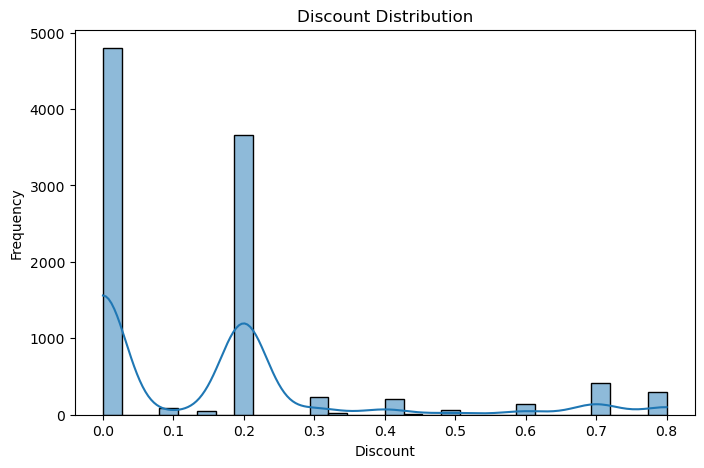

In [61]:
# Discount distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['Discount'], bins=30, kde=True)
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

In [62]:
# Box plot of discount
discount_box_fig = px.box(merged_data, y='Discount', height=600, width=800, title='Box Plot of Discount')
discount_box_fig.show()

In [63]:
# What is the discount distribution across different customer segments?
age_segment_fig = px.box(merged_data, x='Segment', y='Discount', color='Segment', height=600, width=800, title='Discount Distribution Across Customer Segments')
age_segment_fig.show()

In [64]:
# ANOVA test to see if discount differs significantly across customer segments
# Get the discount values for each segment
segment_discounts = [group['Discount'].values for name, group in merged_data.groupby('Segment')]

# Perform ANOVA
anova_result = stats.f_oneway(*segment_discounts)
anova_result
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print("There is a significant difference in discount across customer segments.")
else:
    print("No significant difference in discount across customer segments.")

ANOVA result: F-statistic = 2.0969225057441223, p-value = 0.12288792419848278
No significant difference in discount across customer segments.


In [65]:
# What is the discount distribution across different customer regions?
region_segment_fig = px.box(merged_data, x='Region', y='Discount', color='Region', height=600, width=800, title='Discount Distribution Across Customer Regions')
region_segment_fig.show()
# ANOVA test to see if discount differs significantly across customer regions
region_discounts = [group['Discount'].values for name, group in merged_data.groupby('Region')]
anova_region_discount_result = stats.f_oneway(*region_discounts)
print(f"ANOVA result: F-statistic = {anova_region_discount_result.statistic}, p-value = {anova_region_discount_result.pvalue}")
if anova_region_discount_result.pvalue < 0.05:
    print("There is a significant difference in discount across customer regions.")
else:
    print("No significant difference in discount across customer regions.")

ANOVA result: F-statistic = 2.3234618628111905, p-value = 0.07291493307877009
No significant difference in discount across customer regions.


In [66]:
# What is the discount distribution across different State categories?
state_segment_fig = px.box(merged_data, x='State', y='Discount', color='State', height=800, width=1000, title='Discount Distribution Across Different States')
state_segment_fig.show()
# Descriptive statistics for discount cross State categories
print(merged_data.groupby('State')['Discount'].describe())
# ANOVA test to see if discount differs significantly across states
state_discounts = [group['Discount'].values for name, group in merged_data.groupby('State')]
anova_state_discount_result = stats.f_oneway(*state_discounts)
print(f"ANOVA result: F-statistic = {anova_state_discount_result.statistic}, p-value = {anova_state_discount_result.pvalue}")
if anova_state_discount_result.pvalue < 0.05:
    print("There is a significant difference in discount across states.")
else:
    print("No significant difference in discount across states.")

                       count      mean       std  min  25%   50%     75%  max
State                                                                        
Alabama                127.0  0.178504  0.210031  0.0  0.0  0.20  0.2000  0.8
Arizona                301.0  0.184053  0.220745  0.0  0.0  0.20  0.2000  0.8
Arkansas                21.0  0.271429  0.266726  0.0  0.0  0.20  0.3000  0.7
California            1998.0  0.143093  0.196949  0.0  0.0  0.00  0.2000  0.8
Colorado               283.0  0.215618  0.231939  0.0  0.0  0.20  0.2000  0.8
Connecticut             74.0  0.194595  0.257433  0.0  0.0  0.20  0.2000  0.8
Delaware                93.0  0.141935  0.180773  0.0  0.0  0.10  0.2000  0.8
District of Columbia    11.0  0.100000  0.214476  0.0  0.0  0.00  0.1000  0.7
Florida                290.0  0.180414  0.225135  0.0  0.0  0.20  0.2000  0.8
Georgia                201.0  0.109950  0.190001  0.0  0.0  0.00  0.2000  0.8
Illinois               574.0  0.190575  0.228147  0.0  0.0  0.20

State-wise discount analysis shows that states like Arkansas (mean discount: 27.14%), Colorado (21.56%), and Oregon (22.83%) offer higher average discounts compared to states like Maryland (7.29%) and Oklahoma (3.75%). The ANOVA test confirms that these differences are statistically significant (p-value < 0.05). This insight can help tailor discount strategies based on state-specific customer behavior.
- Investigate whether higher discounts lead to increased sales and profitability in different states.
- Top 5 states with highest average discounts: Arkansas, Oregon, Colorado, Arizona, North Carolina.
- Bottom 5 states with lowest average discounts: Oklahoma, Maryland, South Dakota, Nevada, New Mexico.

In [67]:
# What is the discount distribution across different Ship Modes?
ship_mode_segment_fig = px.box(merged_data, x='Ship Mode', y='Discount', color='Ship Mode', height=600, width=800, title='Discount Distribution Across Different Ship Modes')
ship_mode_segment_fig.show()
# Descriptive statistics for discount cross Ship Mode categories
print(merged_data.groupby('Ship Mode')['Discount'].describe())
# ANOVA test to see if discount differs significantly across Ship Modes
ship_mode_discounts = [group['Discount'].values for name, group in merged_data.groupby('Ship Mode')]
anova_ship_mode_discount_result = stats.f_oneway(*ship_mode_discounts)
print(f"ANOVA result: F-statistic = {anova_ship_mode_discount_result.statistic}, p-value = {anova_ship_mode_discount_result.pvalue}")
if anova_ship_mode_discount_result.pvalue < 0.05:
    print("There is a significant difference in discount across Ship Modes.")
else:
    print("No significant difference in discount across Ship Modes.")

                 count      mean       std  min  25%  50%  75%  max
Ship Mode                                                          
First Class     1538.0  0.164610  0.210319  0.0  0.0  0.2  0.2  0.8
Same Day         543.0  0.152394  0.198365  0.0  0.0  0.2  0.2  0.8
Second Class    1945.0  0.138895  0.190728  0.0  0.0  0.0  0.2  0.8
Standard Class  5968.0  0.160023  0.210782  0.0  0.0  0.2  0.2  0.8
ANOVA result: F-statistic = 6.159416358787153, p-value = 0.0003531354423901233
There is a significant difference in discount across Ship Modes.


- The discount distributions vary significantly across different ship modes.
The ship modes with the highest average discounts are First Class (16.46%) and Standard Class (16.00%), while Second Class has the lowest average discount (13.89%). The ANOVA test confirms that these differences are statistically significant (p-value < 0.05). This insight can help optimize shipping strategies to balance cost and customer satisfaction.
- The first class and standard class ship modes are higher discounts, possibly to attract customers and offset higher shipping costs.

In [68]:
# What is the discount distribution across different Categories?
category_segment_fig = px.box(merged_data, x='Category', y='Discount', color='Category', height=600, width=800, title='Discount Distribution Across Different Categories')
category_segment_fig.show()
# Descriptive statistics for discount cross Category categories
print(merged_data.groupby('Category')['Discount'].describe())
# ANOVA test to see if discount differs significantly across Categories
category_discounts = [group['Discount'].values for name, group in merged_data.groupby('Category')]
anova_category_discount_result = stats.f_oneway(*category_discounts)
print(f"ANOVA result: F-statistic = {anova_category_discount_result.statistic}, p-value = {anova_category_discount_result.pvalue}")
if anova_category_discount_result.pvalue < 0.05:
    print("There is a significant difference in discount across Categories.")
else:
    print("No significant difference in discount across Categories.")

                  count      mean       std  min  25%  50%  75%  max
Category                                                            
Furniture        2121.0  0.173923  0.181547  0.0  0.0  0.2  0.3  0.7
Office Supplies  6026.0  0.157285  0.229495  0.0  0.0  0.0  0.2  0.8
Technology       1847.0  0.132323  0.141575  0.0  0.0  0.2  0.2  0.7
ANOVA result: F-statistic = 20.329543937916956, p-value = 1.5449264084212215e-09
There is a significant difference in discount across Categories.



The category with the highest average discount is Furniture (17.39%), followed by Office Supplies (15.73%), and Technology (13.23%). The ANOVA test confirms that these differences are statistically significant (p-value < 0.05). This insight can help tailor discount strategies based on product categories to optimize sales and profitability.
- Furniture items may have higher discounts to encourage purchases of typically lower-profit items. Or customers may expect higher discounts on furniture due to its higher price point and competitive market, cleaning out inventory.
- Technology items have lower discounts, possibly due to higher base prices and profit margins.

In [69]:
# What is the discount distribution across different Sub Categories?
sub_category_segment_fig = px.box(merged_data, x='Sub-Category', y='Discount', color='Sub-Category', height=600, width=800, title='Discount Distribution Across Different Sub Categories')
sub_category_segment_fig.show()
# Descriptive statistics for discount cross Sub-Category categories
print(merged_data.groupby('Sub-Category')['Discount'].describe())
# ANOVA test to see if discount differs significantly across Sub-Category
sub_category_discounts = [group['Discount'].values for name, group in merged_data.groupby('Sub-Category')]
anova_sub_category_discount_result = stats.f_oneway(*sub_category_discounts)
print(f"ANOVA result: F-statistic = {anova_sub_category_discount_result.statistic}, p-value = {anova_sub_category_discount_result.pvalue}")
if anova_sub_category_discount_result.pvalue < 0.05:
    print("There is a significant difference in discount across Sub Categories.")
else:
    print("No significant difference in discount across Sub Categories.")

               count      mean       std  min   25%  50%   75%  max
Sub-Category                                                       
Accessories    775.0  0.078452  0.097714  0.0  0.00  0.0  0.20  0.2
Appliances     466.0  0.166524  0.272771  0.0  0.00  0.0  0.20  0.8
Art            796.0  0.074874  0.096853  0.0  0.00  0.0  0.20  0.2
Binders       1523.0  0.372292  0.310938  0.0  0.20  0.2  0.70  0.8
Books          228.0  0.211140  0.191913  0.0  0.00  0.2  0.32  0.7
Chairs         617.0  0.170178  0.107444  0.0  0.10  0.2  0.30  0.3
Copiers         68.0  0.161765  0.130475  0.0  0.00  0.2  0.20  0.4
Envelopes      254.0  0.080315  0.098237  0.0  0.00  0.0  0.20  0.2
Fasteners      217.0  0.082028  0.098599  0.0  0.00  0.0  0.20  0.2
Furnishings    957.0  0.138349  0.207804  0.0  0.00  0.0  0.20  0.6
Labels         364.0  0.068681  0.095100  0.0  0.00  0.0  0.20  0.2
Machines       115.0  0.306087  0.252804  0.0  0.05  0.2  0.50  0.7
Paper         1370.0  0.074891  0.096832  0.0  0


The sub-categories with the highest average discounts are Machines (30.61%), Tables (26.13%), and Binders (37.23%). These categories likely represent higher-value products. In contrast, sub-categories like Labels (6.87%), Art (7.49%), and Storage (7.47%) have much lower average discounts, indicating they are lower-value items. This information can help prioritize inventory and marketing efforts towards higher-performing sub-categories.
- Machines and Tables may have higher discounts to encourage purchases of typically higher-priced items.
- Binders have high discounts, possibly to clear out inventory or attract bulk buyers.
- Labels, Art, and Storage have lower discounts, possibly due to their lower price points and higher sales volumes.

In [70]:
# What is the discount distribution across different Profit/Loss categories?
profit_loss_segment_fig = px.box(merged_data, x='Profit/Loss', y='Discount', color='Profit/Loss', height=600, width=800, title='Discount Distribution Across Different Profit/Loss Categories')
profit_loss_segment_fig.show()
# Descriptive statistics for discount cross Profit/Loss categories
print(merged_data.groupby('Profit/Loss')['Discount'].describe())
# T-test test to see if discount differs significantly across Profit/Loss categories
profit_loss_discounts = [group['Discount'].values for name, group in merged_data.groupby('Profit/Loss')]
t_test_profit_loss_discount_result = stats.ttest_ind(*profit_loss_discounts)
print(f"T-test result: T-statistic = {t_test_profit_loss_discount_result.statistic}, p-value = {t_test_profit_loss_discount_result.pvalue}")
if t_test_profit_loss_discount_result.pvalue < 0.05:
    print("There is a significant difference in discount across Profit/Loss categories.")
else:
    print("No significant difference in discount across Profit/Loss categories.")

              count      mean       std  min  25%  50%  75%  max
Profit/Loss                                                     
Loss         1871.0  0.480887  0.235080  0.1  0.2  0.4  0.7  0.8
Profit       8123.0  0.081417  0.099192  0.0  0.0  0.0  0.2  0.4
T-test result: T-statistic = 115.02962858368716, p-value = 0.0
There is a significant difference in discount across Profit/Loss categories.


The loss category has a significantly higher average discount (48.09%) compared to the profit category (8.14%). The T-test confirms that this difference is statistically significant (p-value < 0.05). This insight suggests that higher discounts may be associated with unprofitable transactions, indicating a need to balance discount strategies with profitability goals.
- The median discount for loss-making transactions is 40%, while for profitable transactions it is 0%, indicating that many profitable sales occur without discounts.
- The maximum discount offered in loss-making transactions is 80%, which may be too high and negatively impact profitability.
- Discount is the key factor differentiating profit and loss transactions in this dataset.
- Reevaluating discount strategies could help improve overall profitability.
- Focus on selling at low or no discount to increase profit margins, especially for high-demand products or high-value products.

In [71]:
# What is the discount distribution across different age groups?
discount_age_fig = px.box(merged_data, x='Age Group', y='Discount', color='Age Group', height=600, width=800, title='Discount Distribution Across Age Groups')
discount_age_fig.show()
# Descriptive statistics for discount across age groups
print(merged_data.groupby('Age Group', observed=True)['Discount'].describe())
# ANOVA test to see if discount differs significantly across age categories
age_discount = [merged_data[merged_data['Age Group'] == age]['Discount'] for age in merged_data['Age Group'].unique()]
anova_age_result = stats.f_oneway(*age_discount)
print(f"ANOVA result: F-statistic = {anova_age_result.statistic}, p-value = {anova_age_result.pvalue}")
if anova_age_result.pvalue < 0.05:
    print("There is a significant difference in discount across Age Group categories.")
else:
    print("No significant difference in discount across Age Group categories.")

            count      mean       std  min  25%  50%  75%  max
Age Group                                                     
18-30      2142.0  0.164220  0.210902  0.0  0.0  0.2  0.2  0.8
31-45      2837.0  0.158847  0.205954  0.0  0.0  0.2  0.2  0.8
46-60      2678.0  0.147483  0.203597  0.0  0.0  0.0  0.2  0.8
61+        2337.0  0.155635  0.205939  0.0  0.0  0.2  0.2  0.8
ANOVA result: F-statistic = 2.8318062735237133, p-value = 0.036862186381551275
There is a significant difference in discount across Age Group categories.


There is a significant difference in discount across Age Group categories.
- For age groups 18-30 and 31-45, the average discounts are slightly higher (16.42% and 15.88% respectively) compared to older age groups 46-60 (14.75%) and 61+ (15.56%). This suggests that younger customers may be more responsive to discounts, potentially influencing their purchasing behavior.

In [72]:
# What is the discount distribution across different months?
month_segment_fig = px.box(merged_data, x='Month', y='Discount', color='Month', height=600, width=800, title='Discount Distribution Across Different Months')
month_segment_fig.show()
# ANOVA test to see if discount differs significantly across months
month_discounts = [group['Discount'].values for name, group in merged_data.groupby('Month')]
anova_month_discount_result = stats.f_oneway(*month_discounts)
print(f"ANOVA result: F-statistic = {anova_month_discount_result.statistic}, p-value = {anova_month_discount_result.pvalue}")
if anova_month_discount_result.pvalue < 0.05:
    print("There is a significant difference in discount across months.")
else:
    print("No significant difference in discount across months.")

ANOVA result: F-statistic = 0.7149143731674615, p-value = 0.7253874296623296
No significant difference in discount across months.


Overall, the discount analysis reveals significant variations in discount strategies across states, ship modes, product categories, age groups and profit/loss outcomes. These insights can inform targeted discounting approaches to enhance sales performance while maintaining profitability.

#### Profit Analysis

In [73]:
# What is the profit distribution across different customer segments?
profit_segment_fig = px.box(merged_data, x='Segment', y='Profit', color='Segment', height=600, width=800, title='Profit Distribution Across Customer Segments')
profit_segment_fig.show()
# Descriptive statistics for profit across customer segments
merged_data.groupby('Segment')['Profit'].describe()

count       mean         std      min     25%   50%     75%  \
Segment                                                                     
Consumer     5191.0  25.836897  242.594088 -6599.98  1.5850  8.38  28.610   
Corporate    3020.0  30.456772  231.986397 -3839.99  1.9275  8.69  29.845   
Home Office  1783.0  33.818850  212.381596 -3399.98  1.9800  9.10  31.560   

                 max  
Segment               
Consumer     6719.98  
Corporate    8399.98  
Home Office  3919.99

In [74]:
# ANOVA test to see if profit differs significantly across customer segments
anova_result = stats.f_oneway(
    merged_data[merged_data['Segment'] == 'Consumer']['Profit'],
    merged_data[merged_data['Segment'] == 'Corporate']['Profit'],
    merged_data[merged_data['Segment'] == 'Home Office']['Profit']
)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print("There is a significant difference in profit across customer segments.")
else:
    print("No significant difference in profit across customer segments.")

ANOVA result: F-statistic = 0.8981014448131166, p-value = 0.4073751705325088
No significant difference in profit across customer segments.


In [75]:
# What is the profit distribution across different customer regions?
profit_region_fig = px.box(merged_data, x='Region', y='Profit', color='Region', height=600, width=800, title='Profit Distribution Across Customer Regions')
profit_region_fig.show()
# Descriptive statistics for profit across customer regions
merged_data.groupby('Region')['Profit'].describe()

count       mean         std      min     25%    50%      75%  \
Region                                                                    
Central  2371.0  26.828199  165.759190 -1862.31  1.5300  7.860  29.0550   
East     2762.0  34.252075  229.805819 -1665.05  1.7600  8.455  27.9900   
South    1626.0  18.558137  287.871799 -6599.98  1.7675  9.000  32.6125   
West     3235.0  30.296250  250.251927 -3399.98  1.9000  9.190  29.6350   

             max  
Region            
Central  5039.99  
East     6719.98  
South    3177.48  
West     8399.98

In [76]:
# ANOVA test to see if profit differs significantly across customer regions
anova_result = stats.f_oneway(
    merged_data[merged_data['Region'] == 'East']['Profit'],
    merged_data[merged_data['Region'] == 'West']['Profit'],
    merged_data[merged_data['Region'] == 'Central']['Profit']
)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print("There is a significant difference in profit across customer regions.")
else:
    print("No significant difference in profit across customer regions.")

ANOVA result: F-statistic = 0.7168568381374917, p-value = 0.4883145981237146
No significant difference in profit across customer regions.


In [77]:
# What is the profit distribution across different customer regions?
profit_region_fig = px.box(merged_data, x='State', y='Profit', color='Region', color_discrete_sequence=px.colors.qualitative.Set1, height=800, width=1000, title='Profit Distribution Across Customer Regions')
profit_region_fig.show()
# Descriptive statistics for profit cross State categories
merged_data.groupby('State')['Profit'].describe()

count       mean         std      min     25%     50%  \
State                                                                          
Alabama                127.0  22.402520  208.709685 -1237.85  0.0850   7.250   
Arizona                301.0  31.771628  322.120448 -1181.28  0.0000   7.460   
Arkansas                21.0  -2.998571   59.599418  -173.35 -7.4600  -1.220   
California            1998.0  29.728944  177.857678 -2929.48  2.5100   9.840   
Colorado               283.0   3.429117  231.230585 -3399.98 -4.0350   6.510   
Connecticut             74.0   7.209459  159.388797  -786.74  1.7850  10.270   
Delaware                93.0  35.875269  100.318964  -131.95  1.7600   9.870   
District of Columbia    11.0  44.633636   80.746584    -6.03  7.4400   9.330   
Florida                290.0   2.589276  229.769718 -3701.89  1.0375   7.510   
Georgia                201.0  63.589055  257.225107  -213.56  2.8300  11.690   
Illinois               574.0  16.655418  113.742825  -938.28  0.5900   6.505   
Indiana                167.0  16.212036   50.951695  -172.12  2.9450   9.480   
Iowa                    45.0  50.191111   95.777671   -30.39  5.8900  14.240   
Kansas                  13.0  10.708462   26.500089   -24.48  1.7100  11.630   
Kentucky               149.0  30.290671   80.398646  -216.98  2.7700  10.950   
Louisiana               85.0  31.285647  162.714028  -913.18  3.1100   8.640   
Maryland                24.0  18.193750   24.504451    -4.80  4.6725   9.710   
Massachusetts          114.0  51.802982  260.035280  -302.72  2.5375  10.925   
Michigan               220.0  35.237773  172.518894 -1862.31  2.7275  12.195   
Minnesota              167.0  43.129162  170.552080  -786.01  3.5500   9.640   
Mississippi             61.0   9.027705  361.742704 -2639.99  2.1900  11.240   
Missouri                60.0  36.881167  125.245369  -320.24  3.9600   8.025   
Nebraska                32.0  36.438437  154.593887  -384.72  4.5200   9.750   
Nevada                  12.0  23.172500   44.995018     1.67  4.5500   7.460   
New Hampshire           28.0  54.256071  120.497393   -70.49  3.7325   9.325   
New Jersey             123.0  18.998211   75.289949  -430.62  0.9950   8.000   
New Mexico              41.0  32.686585   44.536309    -9.56  5.2200  18.090   
New York              1110.0  52.412414  317.875647 -1306.55  2.8500   9.175   
North Carolina         343.0 -12.351749  464.693226 -6599.98  1.1950   7.490   
Ohio                   480.0  12.470479  102.854824  -950.40  1.0300   6.655   
Oklahoma                16.0  51.814375   72.328343     0.70  4.7175  13.090   
Oregon                  60.0   3.901167  294.828624 -1850.95 -4.3850   3.590   
Pennsylvania           641.0  21.224509  156.807004 -1665.05  0.5900   6.720   
Rhode Island            64.0  35.573437   91.223828   -87.15  2.4725   8.605   
South Dakota            16.0  42.660000   48.632135   -11.66  5.9875  23.825   
Tennessee              167.0  20.564850  128.511784 -1065.37  2.1550   9.070   
Texas                  917.0  22.387099  202.903292 -1359.99  0.6000   6.370   
Utah                    80.0  22.727625  181.226375 -1002.78  0.3825   8.370   
Virginia               182.0  38.132582  258.104585 -1480.03  2.0250  10.330   
Washington             460.0  53.055957  429.922789  -653.28  2.1300   8.995   
Wisconsin              144.0  59.513125  198.996169  -182.64  4.3850  12.370   

                          75%      max  
State                                   
Alabama               34.5350  1459.20  
Arizona               32.1000  4946.37  
Arkansas              11.8700   161.97  
California            30.9875  4630.48  
Colorado              24.1200  1270.99  
Connecticut           29.2300   415.99  
Delaware              46.1800   609.72  
District of Columbia  22.1250   244.62  
Florida               24.0875   374.38  
Georgia               40.4400  3177.48  
Illinois              23.6975  1644.29  
Indiana               26.4850   314.27  
Iowa    

In [78]:
# ANOVA test to see if profit differs significantly across customer regions
profit_groups = [merged_data[merged_data['Region'] == region]['Profit'].dropna() for region in merged_data['Region'].unique()]
anova_profit_result = stats.f_oneway(*profit_groups)
print(f"ANOVA result: F-statistic = {anova_profit_result.statistic}, p-value = {anova_profit_result.pvalue}")
if anova_profit_result.pvalue < 0.05:
    print("There is a significant difference in profit across customer regions.")
else:
    print("No significant difference in profit across customer regions.")


ANOVA result: F-statistic = 1.633742925742889, p-value = 0.17924706987207947
No significant difference in profit across customer regions.


In [79]:
# What is the profit distribution across different Ship Modes?
profit_ship_mode_fig = px.box(merged_data, x='Ship Mode', y='Profit', color='Ship Mode', height=600, width=800, title='Profit Distribution Across Ship Modes')
profit_ship_mode_fig.show()
# Descriptive statistics for profit across ship modes
merged_data.groupby('Ship Mode')['Profit'].describe()

count       mean         std      min     25%   50%      75%  \
Ship Mode                                                                       
First Class     1538.0  31.840020  257.794294 -2639.99  1.7925  8.78  28.8350   
Same Day         543.0  29.266851  226.689478 -3839.99  2.1550  8.03  29.5650   
Second Class    1945.0  29.535470  152.822282 -1862.31  2.6000  9.43  33.2200   
Standard Class  5968.0  27.494881  250.010674 -6599.98  1.4700  8.30  28.7625   

                    max  
Ship Mode                
First Class     6719.98  
Same Day        2229.02  
Second Class    2799.98  
Standard Class  8399.98

In [80]:
# ANOVA test to see if profit differs significantly across Ship Modes
anova_result = stats.f_oneway(
    merged_data[merged_data['Ship Mode'] == 'Standard Class']['Profit'],
    merged_data[merged_data['Ship Mode'] == 'Second Class']['Profit'],
    merged_data[merged_data['Ship Mode'] == 'First Class']['Profit'],
    merged_data[merged_data['Ship Mode'] == 'Same Day']['Profit']
)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print("There is a significant difference in profit across Ship Modes.")
else:
    print("No significant difference in profit across Ship Modes.")


ANOVA result: F-statistic = 0.1539104331482834, p-value = 0.9272120707211975
No significant difference in profit across Ship Modes.


In [81]:
# What is the profit distribution across different Categories?
profit_category_fig = px.box(merged_data, x='Category', y='Profit', color='Category', height=600, width=800, title='Profit Distribution Across Categories')
profit_category_fig.show()
# Descriptive statistics for profit across categories
merged_data.groupby('Category')['Profit'].describe()

count       mean         std      min      25%     50%  \
Category                                                                   
Furniture        2121.0   8.699316  136.049323 -1862.31 -12.8500   7.770   
Office Supplies  6026.0  20.327063  164.887346 -3701.89   2.1025   6.885   
Technology       1847.0  78.752388  428.816759 -6599.98   5.2000  25.020   

                     75%      max  
Category                           
Furniture        33.7300  1013.13  
Office Supplies  19.4175  4946.37  
Technology       74.8950  8399.98

In [82]:
# ANOVA test to see if profit differs significantly across categories
anova_result = stats.f_oneway(
    merged_data[merged_data['Category'] == 'Furniture']['Profit'],
    merged_data[merged_data['Category'] == 'Office Supplies']['Profit'],
    merged_data[merged_data['Category'] == 'Technology']['Profit']
)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print("There is a significant difference in profit across categories.")
else:
    print("No significant difference in profit across categories.")


ANOVA result: F-statistic = 54.311638544183815, p-value = 3.467806223383911e-24
There is a significant difference in profit across categories.


In [83]:
# What is the profit distribution across different Sub Categories?
profit_sub_category_fig = px.box(merged_data, x='Sub-Category', y='Profit', color='Sub-Category', height=600, width=800, title='Profit Distribution Across Sub Categories')
profit_sub_category_fig.show()
# Descriptive statistics for profit across sub categories
merged_data.groupby('Sub-Category')['Profit'].describe()

count        mean          std      min       25%      50%  \
Sub-Category                                                                
Accessories    775.0   54.111974   106.155481   -75.60    5.7750   21.000   
Appliances     466.0   38.922897   148.319322 -1181.28    4.0650   17.450   
Art            796.0    8.200955    13.384232     0.15    1.6850    3.720   
Binders       1523.0   19.843493   306.196875 -3701.89   -6.0250    3.980   
Books          228.0  -15.230526   182.034336 -1665.05  -42.6325    4.135   
Chairs         617.0   43.095867   127.099999  -630.88  -14.4800   13.320   
Copiers         68.0  817.910294  1460.921556    60.00  164.2475  332.990   
Envelopes      254.0   27.417717    35.354703     0.55    5.9050   12.715   
Fasteners      217.0    4.375714     5.054964   -11.83    0.8700    2.840   
Furnishings    957.0   13.646029    52.753256  -427.45    2.7900    9.100   
Labels         364.0   15.236758    34.084317     0.68    3.4650    6.870   
Machines       115.0   29.432435  1099.070271 -6599.98 -104.6100   39.000   
Paper         1370.0   24.856453    35.225415     1.07    6.1625   11.540   
Phones         889.0   50.074522   113.251222  -386.39    4.9600   23.520   
Storage        846.0   25.152541    81.923647  -337.81    0.8500    7.755   
Supplies       190.0   -6.257842   105.059509 -1049.34    0.4400    3.960   
Tables         319.0  -55.566113   230.565048 -1862.31 -122.8300  -31.370   

                   75%      max  
Sub-Category                     
Accessories    57.3550   829.38  
Appliances     56.1125   793.72  
Art             8.6750   112.57  
Binders        15.8350  4946.37  
Books          40.0550  1013.13  
Chairs         70.2000   770.35  
Copiers       848.7400  8399.98  
Envelopes      32.5375   204.07  
Fasteners       6.2300    21.89  
Furnishings    21.8200   387.57  
Labels         13.3025   385.38  
Machines      219.5250  2799.98  
Paper          26.8800   352.30  
Phones         67.5000  1228.18  
Storage        24.8550   792.27  
Supplies        9.0825   327.51  
Tables         33.8500   629.01

In [84]:
# ANOVA test to see if profit differs significantly across sub categories
profit_sub_category_groups = [merged_data[merged_data['Sub-Category'] == subcategory]['Profit'] for subcategory in merged_data['Sub-Category'].unique()]
anova_profit_sub_category_result = stats.f_oneway(*profit_sub_category_groups)
print(f"ANOVA result: F-statistic = {anova_profit_sub_category_result.statistic}, p-value = {anova_profit_sub_category_result.pvalue}")
if anova_profit_sub_category_result.pvalue < 0.05:
    print("There is a significant difference in profit across Sub Categories.")
else:
    print("No significant difference in profit across Sub Categories.")

ANOVA result: F-statistic = 58.82082180393576, p-value = 2.81154065598055e-181
There is a significant difference in profit across Sub Categories.


In [85]:
# What is the profit distribution across different age groups?
profit_age_group_fig = px.box(merged_data, x='Age Group', y='Profit', color='Age Group', height=600, width=800, title='Profit Distribution Across Age Groups')
profit_age_group_fig.show()
# Descriptive statistics for profit across age groups
merged_data.groupby('Age Group', observed=True)['Profit'].describe()

count       mean         std      min   25%    50%     75%  \
Age Group                                                                
18-30      2142.0  31.706261  306.228841 -3839.99  1.44  7.990  27.290   
31-45      2837.0  20.505048  204.789703 -6599.98  1.68  8.950  28.760   
46-60      2678.0  30.119679  163.426250 -1862.31  2.15  9.275  32.265   
61+        2337.0  34.082011  259.164638 -1850.95  1.68  8.470  30.100   

               max  
Age Group           
18-30      8399.98  
31-45      2365.98  
46-60      2504.22  
61+        6719.98

In [86]:
# ANOVA test to see if profit differs significantly across age group categories
profit_age_group_groups = [merged_data[merged_data['Age Group'] == age_group]['Profit'] for age_group in merged_data['Age Group'].unique()]
anova_profit_age_group_result = stats.f_oneway(*profit_age_group_groups)
print(f"ANOVA result: F-statistic = {anova_profit_age_group_result.statistic}, p-value = {anova_profit_age_group_result.pvalue}")
if anova_profit_age_group_result.pvalue < 0.05:
    print("There is a significant difference in profit across Age Groups.")
else:
    print("No significant difference in profit across Age Groups.")


ANOVA result: F-statistic = 1.7190748073093414, p-value = 0.16071359445775768
No significant difference in profit across Age Groups.


In [87]:
# What is the profit distribution across different month groups?
profit_month_fig = px.box(merged_data, x='Month', y='Profit', color='Month', height=600, width=800, title='Profit Distribution Across Months')
profit_month_fig.show()
# Descriptive statistics for profit across month groups
print(merged_data.groupby('Month')['Profit'].describe())
# ANOVA test to see if profit differs significantly across month categories
month_profit = [merged_data[merged_data['Month'] == month]['Profit'] for month in merged_data['Month'].unique()]
anova_month_profit_result = stats.f_oneway(*month_profit)
print(f"ANOVA result: F-statistic = {anova_month_profit_result.statistic}, p-value = {anova_month_profit_result.pvalue}")
if anova_month_profit_result.pvalue < 0.05:
    print("There is a significant difference in profit across Month categories.")
else:
    print("No significant difference in profit across Month categories.")

        count       mean         std      min     25%     50%      75%  \
Month                                                                    
1       381.0  23.975013  221.694901 -1862.31  1.4800   7.600  26.4000   
2       300.0  34.315400  190.721837  -426.99  1.8825   8.475  30.6825   
3       696.0  41.084253  329.746292 -1811.08  1.5875   8.685  31.9350   
4       668.0  17.346662  219.361917 -3399.98  1.3625   6.555  24.2475   
5       735.0  30.491646  123.996040  -458.15  1.7750   9.100  27.0350   
6       717.0  29.687406  122.952811  -525.64  1.6800   9.020  31.0100   
7       710.0  19.482746  173.705345 -3701.89  1.8475   8.315  33.6650   
8       706.0  30.845708  135.147295 -1237.85  2.4000  10.585  33.5175   
9      1383.0  26.650398  192.928592 -1665.05  2.0550   8.280  28.5500   
10      819.0  38.808547  370.590587 -1306.55  1.1550   7.480  23.0450   
11     1471.0  24.111829  286.967683 -6599.98  1.4900   8.990  29.4050   
12     1408.0  30.802010  222.342045 -

- The profit distributions vary significantly across different categories. Technology has the highest median profit and the widest range, indicating higher profit values and greater variability. Furniture has moderate profit with a narrower range, while Office Supplies has the lowest median profit and the least variability. The ANOVA test confirms that these differences are statistically significant (p-value < 0.05).
- The sub-categories with the highest average profit are Copiers ($817.91), Accessories ($54.11), and Phones ($50.07). These categories likely represent higher-margin products. In contrast, sub-categories like Tables (-$55.57), Books (-$15.23), and Supplies (-$6.26) have negative average profits, indicating they are loss-making items. This information can help prioritize inventory and marketing efforts towards higher-performing sub-categories.
Another observation is that there are not significant differences in profit across customer segments, ship modes, regions, and age group categories. In all these cases, the p-values from ANOVA tests are greater than 0.05, indicating that profit distributions are similar across these different groupings. This suggests that these attributes do not significantly impact profit in this dataset.
- Overall, the analysis indicates that while customer age does not vary significantly across most attributes, sales and profit performance is strongly influenced by product category and sub-category. This insight can guide strategic decisions in marketing, inventory management, and customer targeting to optimize profit outcomes.

In [88]:
### Sales vs Profit with categories
high_selling_sub_categories = merged_data.groupby('Category')[['Sales', 'Profit']].sum()
high_selling_sub_categories = high_selling_sub_categories.reset_index()
top_sub_melted = high_selling_sub_categories.melt(id_vars='Category', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Value')
high_selling_sub_categories_fig = px.bar(top_sub_melted, x='Category', y='Value', color='Metric',height=600, width=800, text_auto=True, title='Total Sales and Profit by Category', labels={'x': 'Category', 'y': 'Total Sales'})
high_selling_sub_categories_fig.show()

### Sales vs Profit with sub-categories

In [89]:
# High-selling sub-categories
high_selling_sub_categories = merged_data.groupby('Sub-Category')[['Sales', 'Profit']].sum()
high_selling_sub_categories = high_selling_sub_categories.reset_index()
top_sub_melted = high_selling_sub_categories.melt(id_vars='Sub-Category', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Value')
high_selling_sub_categories_fig = px.bar(top_sub_melted, x='Sub-Category', y='Value', color='Metric',height=1000, width=1400, text_auto=True, title='Total Sales and Profit by Sub-Category', labels={'x': 'Sub-Category', 'y': 'Total Sales'})
high_selling_sub_categories_fig.show()

In [90]:
# Scatter plot total profit vs quantity with sales size by sub-category
profit_sales_by_subcategory = merged_data.groupby('Sub-Category', observed=True).agg({'Profit': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).reset_index()
profit_sales_by_subcategory['Label'] = profit_sales_by_subcategory['Sub-Category'] + '<br>Quantity: ' + profit_sales_by_subcategory['Quantity'].astype(str)
# Create scatter plot
fig = px.scatter(
    profit_sales_by_subcategory,
    x='Sales',
    y='Profit',
    color='Sub-Category',
    color_discrete_sequence=px.colors.qualitative.Vivid, 
    height=1000, 
    width=1400,
    size='Quantity',
    size_max=80,
    text='Label',
    title='Total Profit vs Quantity by Sub-Category',
    labels={'Quantity': 'Total Quantity', 'Profit': 'Total Profit'}
)
fig.update_layout(yaxis_tickformat='$,.0f',
                  xaxis_tickformat='$,.0f')
fig.add_hline(y=profit_sales_by_subcategory['Profit'].mean(), line_dash="dash", line_color="gray",
              annotation_text="Average Profit", annotation_position="top left")
fig.add_hline(y=0, line_dash="dot", line_color="red",
              annotation_text="Break-even Line", annotation_position="bottom left")
fig.add_vline(x=profit_sales_by_subcategory['Sales'].mean(), line_dash="dash", line_color="gray",
              annotation_text="Average Sales", annotation_position="top right")
fig.show()


### Key Observations
- Phone high quantity and very high profit, this sub-category is a clear profit driver.
- Chairs have a high quantity, but profit is much lower compared to phones, an opportunity to improve profit margin on chairs.
- Tables quantity but negative profit, need to investigate reasons for losses and consider strategies to improve profitability or discontinue. This is a red flag for the business, even though sales are high. They are losing money on this sub-category.
- Binders and Paper: high quantities sold but relatively modest profit, opportunity to optimize pricing or cost structure to boost profitability.
- Copiers have  low quantity but very high profit, focus on marketing and sales efforts to maximize revenue from this sub-category. This is a premium product with a high profit margin.
- Accessories, Storage, and Furnishings are mid-tier items with moderate quantities and profits; these are steady contributors to overall profitability.
- Fasteners, Envelopes, Art, and Machines, with low quantities and low profits, may not warrant significant focus but should be reviewed periodically to ensure they do not negatively impact overall profitability.
- Books' negative profit should be carefully analyzed to identify reasons for losses and consider strategies such as price adjustments, cost reductions, or discontinuation if profitability cannot be improved.
### Key Recommendations
- Focus on Phones and Copiers as key profit drivers.
- Investigate and address losses in Tables, Supplies, and Books sub-categories.
- Optimize Chairs has good sales volume but a weaker profit margin. Explore pricing or cost strategies to boost profitability.
- Leverage Binders and Paper for steady revenue, while monitoring mid-tier items for sales trends.
- Reassess low performers like Fasteners, Envelopes, Art, and Machines may not justify significant focus, heavy marketing, or inventory efforts.

In [91]:
# Scatter plot average profit vs average discount with sales size by sub-category
avg_profit_discount_by_subcategory = merged_data.groupby('Sub-Category', observed=True).agg({'Profit': 'sum', 'Discount': 'mean', 'Quantity': 'sum'}).reset_index()
print(avg_profit_discount_by_subcategory)
avg_profit_discount_by_subcategory['Label'] = avg_profit_discount_by_subcategory['Sub-Category'] + '<br>Quantity: ' + avg_profit_discount_by_subcategory['Quantity'].astype(str)
# Create scatter plot
fig = px.scatter(
    avg_profit_discount_by_subcategory,
    x='Discount',
    y='Profit',
    color='Sub-Category',
    color_discrete_sequence=px.colors.qualitative.Vivid, 
    height=1000, 
    width=1400,
    size='Quantity',
    size_max=80,
    text='Label',
    title='Average Profit vs Average Discount by Sub-Category',
    labels={'Quantity': 'Total Quantity', 'Profit': 'Average Profit'}
)
fig.update_layout(yaxis_tickformat='$,.0f',
                  xaxis_tickformat='.0%')
fig.add_hline(y=avg_profit_discount_by_subcategory['Profit'].mean(), line_dash="dash", line_color="gray",
              annotation_text="Average Profit", annotation_position="top left")
fig.add_hline(y=0, line_dash="dot", line_color="red",
              annotation_text="Break-even Line", annotation_position="bottom left")
fig.add_vline(x=avg_profit_discount_by_subcategory['Discount'].mean(), line_dash="dash", line_color="gray",
              annotation_text="Average Discount", annotation_position="top right")
fig.show()


   Sub-Category    Profit  Discount  Quantity
0   Accessories  41936.78  0.078452      2976
1    Appliances  18138.07  0.166524      1729
2           Art   6527.96  0.074874      3000
3       Binders  30221.64  0.372292      5974
4         Books  -3472.56  0.211140       868
5        Chairs  26590.15  0.170178      2356
6       Copiers  55617.90  0.161765       234
7     Envelopes   6964.10  0.080315       906
8     Fasteners    949.53  0.082028       914
9   Furnishings  13059.25  0.138349      3563
10       Labels   5546.18  0.068681      1400
11     Machines   3384.73  0.306087       440
12        Paper  34053.34  0.074891      5178
13       Phones  44516.25  0.154556      3289
14      Storage  21279.05  0.074704      3158
15     Supplies  -1188.99  0.076842       647
16       Tables -17725.59  0.261285      1241


### Key Observations
- Copiers' profit is very high (55617.90), low quantity sold (234), discount at 16% is a high margin product, but low sales volume.
- Phone's profit is high (44516.25), high quantity sold (3289), discount at 15% good balance of volume and margin. Strong balance of sales and profit.
- Accessories profit is good (41936.78), high quantity sold (2976), discount at 8% solid performer. A healthy margin product with good sales volume.
- Paper profit is good (34053.34), very high quantity sold (5178), discount at 7.5% high volume, low margin product. A volume driver with solid profit contribution.

=> These are profit drivers for the business.

- Binders' profit is good (30221.64), very high quantity sold (5974), discount at 37% very high discount to drive volume, but still profitable. The high discount strategy is working here. It is heavily discount-driven. Without a discount, it may be loss-making.
- Chair's profit is moderate (26590.15), high quantity sold (2356), discount at 17% opportunity to improve margin on good sales volume.

=> These are volume drivers but discount-sensitive. Test smaller discounts to see demand impact.

- Storage profit is moderate (21279.05), high quantity sold (3158), discount at 7.5% solid performer.
- Furnishings profit is moderate (13059.25), moderate quantity sold (3563), discount at 14% steady contributor.
- Appliances profit is moderate (18138.07), moderate quantity sold (1729), discount at 16% steady contributor.
- Art profit is low (6527.96), moderate quantity sold (3000), discount at 7.5% low performer.

=> These categories sell decently but are not major profit contributors. Monitor for trends. They may need to optimize costs or bundle with other products to boost sales.

- The table's profit is negative (-17725.59), a moderate quantity was sold (1241), and a discount of 26% needs to be investigated to determine the reasons for the losses and consider strategies to improve profitability or discontinue.
- Book's profit is negative (-3472.56), low quantity sold (868), discount at 21% need to investigate reasons for losses and consider strategies to improve profitability or discontinue.
- Supplies profit is negative (-1188.99), low quantity sold (647), discount at 7.5% need to investigate reasons for losses and consider strategies to improve profitability or discontinue.

=> These are loss-making sub-categories that require immediate attention. Analyze cost structure, pricing, and demand to identify improvement strategies or consider discontinuation. The problems here could be high costs, low prices, or insufficient demand.

- Feasters, Labels, Evenlopes, and Machines have low profit but are not loss-making, with moderate to low quantity sold. These may not warrant significant focus, but should be reviewed periodically to ensure they do not negatively impact overall profitability.
### Key Recommendations
- Protect Stars: Focus on maximizing sales and marketing efforts for Copiers, Phones, Accessories, and Paper to leverage their substantial profit and sales performance. Keep low discounts, invest in supply chain efficiency to maintain healthy margins.
- Optimize Cash Cows: Review discount strategies for Binders and Chairs to improve profit margins without significantly impacting sales volume. Experiment with lower discounts to find the optimal balance.
- Monitor Steady Contributors: Keep an eye on Storage, Furnishings, Appliances, and Art for any changes in sales trends. Consider bundling or promotional strategies to boost their performance.
- Address Loss-Makers: Conduct a thorough analysis of Tables, Books, and Supplies to identify the root causes of losses. Explore options such as price adjustments, cost reductions, or discontinuation if profitability cannot be improved.
- Review Low Performers: Periodically assess Fasteners, Labels, Envelopes, and Machines to ensure they do not negatively impact overall profitability. Consider phasing out if they consistently underperform.

In [92]:
# Products with highest profit
top_profit_products = merged_data.groupby('Product ID', observed=True)['Profit'].sum().sort_values(ascending=False)
print("Top 10 products with highest profit:")
print(top_profit_products.head(10))
print("Bottom 10 products with lowest profit:")
print(top_profit_products.tail(10))

Top 10 products with highest profit:
Product ID
TEC-CO-10004722    25199.94
OFF-BI-10003527     7753.06
TEC-CO-10001449     6983.89
TEC-CO-10003763     4570.94
TEC-AC-10002049     4425.32
TEC-MA-10001127     4094.98
TEC-MA-10003979     3772.95
TEC-MA-10001047     3717.97
OFF-BI-10001120     3345.29
TEC-MA-10000045     3343.53
Name: Profit, dtype: float64
Bottom 10 products with lowest profit:
Product ID
FUR-TA-10004289   -1148.44
FUR-TA-10001950   -1201.06
OFF-SU-10002881   -1299.19
TEC-MA-10002412   -1811.08
OFF-BI-10004995   -1878.17
FUR-TA-10001889   -1934.40
FUR-TA-10000198   -2876.11
TEC-MA-10004125   -3839.99
TEC-MA-10000822   -4589.97
TEC-MA-10000418   -8879.97
Name: Profit, dtype: float64


In summary, the profit analysis highlights the need to focus on high-performing sub-categories while addressing the challenges faced by loss-making items. Strategic adjustments in pricing, discounting, and marketing can help optimize overall profitability.
### Discount Analysis
- The discount analysis reveals significant variations in discount strategies across states, ship modes, product categories, age groups and profit/loss outcomes. These insights can inform targeted discounting approaches to enhance sales performance while maintaining profitability. The category and sub-category analyses provide actionable recommendations for optimizing inventory management, marketing strategies, and overall business performance.
### Key Findings
- States like Arkansas, Oregon, and Colorado offer higher average discounts, while states like Maryland and Oklahoma have lower discounts.
- First Class and Standard Class ship modes have higher average discounts compared to Second Class.
- Furniture category has the highest average discount, while Technology has the lowest.
- Loss-making transactions have significantly higher average discounts compared to profitable ones.
- Younger age groups (18-30 and 31-45) tend to receive slightly higher discounts compared to older age groups (46-60 and 61+).
## Summary of Findings
Overall, the discount analysis reveals significant variations in discount strategies across states, ship modes, product categories, age groups and profit/loss outcomes. These insights can inform targeted discounting approaches to enhance sales performance while maintaining profitability. The category and sub-category analyses provide actionable recommendations for optimizing inventory management, marketing strategies, and overall business performance. Profitability appears to be strongly influenced by product category and sub-category, while customer demographics such as age, segment, ship mode, and region have less impact.

### Suggested Next Steps
- Further investigate the impact of discounts on sales volume and profitability to refine discount strategies.
- Explore customer feedback and preferences regarding discounts to better tailor offerings.
- Conduct A/B testing of different discount strategies to identify the most effective approaches.
- The discount distributions vary significantly across different ship modes.
The ship modes with the highest average discounts are First Class (16.46%) and Standard Class (16.00%), while Second Class has the lowest average discount (13.89%). The ANOVA test confirms that these differences are statistically significant (p-value < 0.05). This insight can help optimize shipping strategies to balance cost and customer satisfaction.
- The first class and standard class ship modes are higher discounts, possibly to attract customers and offset higher shipping costs.
- Negative profit items like Tables, Supplies, and Book should be carefully analyzed to identify reasons for losses. Consider strategies such as price adjustments, cost reductions, or discontinuation if profitability cannot be improved. Review pricing strategies, source alternatives, and marketing approaches to mitigate losses.
- High profit-low quantity items like Copiers should be prioritized for marketing and sales efforts to maximize revenue.
- High profit-high quantity items like Paper, Accessories, Phones and Binders should be stocked adequately to meet demand and capitalize on their profitability. Prioritize in promotions, discounts, and advertising campaigns. Ensure sufficient inventory levels to avoid stockouts, and explore cross-selling opportunities with related products.
- Mid-Tier items like Chairs, Furnishings, Appliances, and Storage should be monitored for sales trends and adjusted inventory levels accordingly. Consider bundling with high-profit items to boost sales.